In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, precision_score,recall_score, accuracy_score, classification_report,roc_auc_score,confusion_matrix 

# Opening DataSet

In [2]:
df = pd.read_csv('heart.csv')
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [3]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
chest_pain_type            303 non-null int64
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null int64
rest_ecg                   303 non-null int64
max_heart_rate_achieved    303 non-null int64
exercise_induced_angina    303 non-null int64
st_depression              303 non-null float64
st_slope                   303 non-null int64
num_major_vessels          303 non-null int64
thalassemia                303 non-null int64
target                     303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Analysis

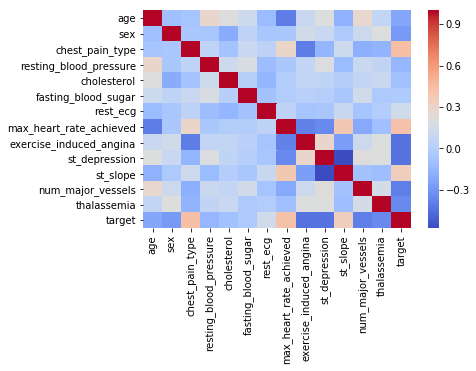

In [6]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


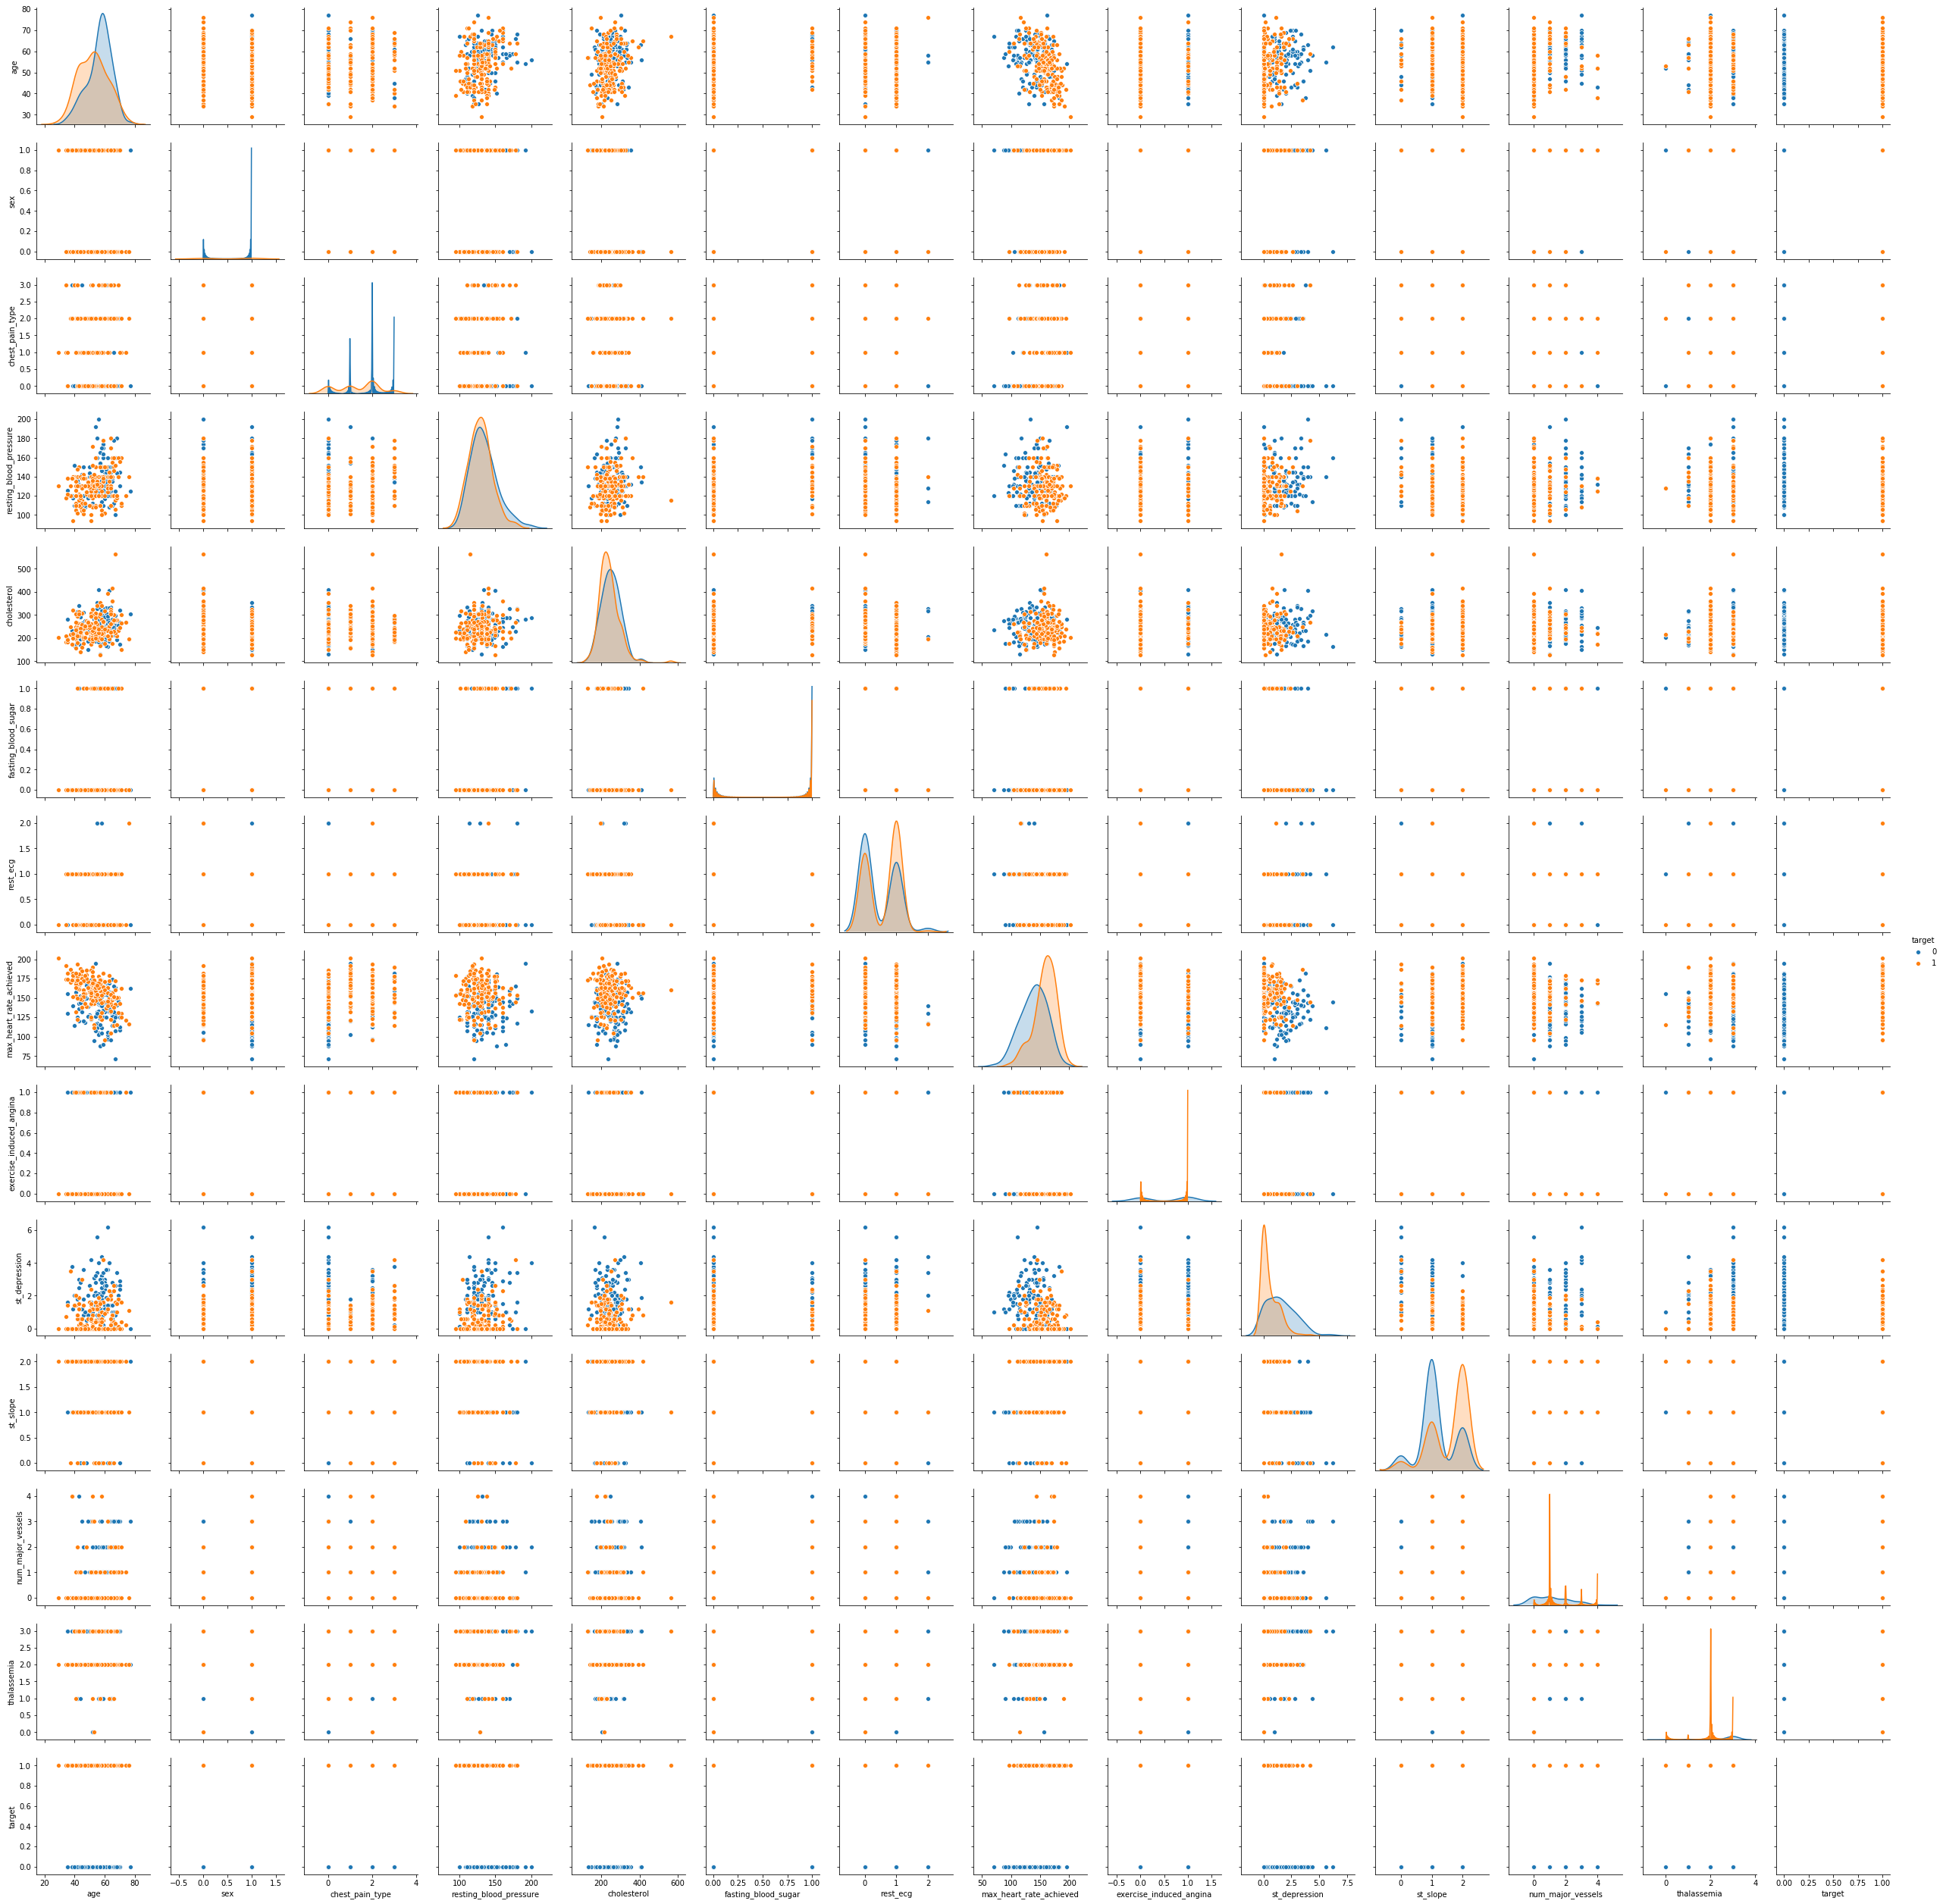

In [7]:
sns.pairplot(df, hue = 'target')
plt.show()

In [8]:
#Here I will categorize the data for easier interpretation
df.loc[df['sex']==0, 'sex_txt']= 'female'
df.loc[df['sex']==1, 'sex_txt']= 'male'

df.loc[df['chest_pain_type']==1,'chest_pain_type_txt'] = 'typical angina'  
df.loc[df['chest_pain_type']==2,'chest_pain_type_txt'] = 'atypical angina' 
df.loc[df['chest_pain_type']==3,'chest_pain_type_txt'] = 'non-anginal pain'
df.loc[df['chest_pain_type']==4,'chest_pain_type_txt'] = 'asymptomatic'    

df.loc[df['fasting_blood_sugar']==0, 'fasting_blood_sugar_txt']= 'lower than 120mg/ml'  
df.loc[df['fasting_blood_sugar']==1, 'fasting_blood_sugar_txt']= 'greater than 120mg/ml'

df.loc[df['rest_ecg']==0,'rest_ecg_txt'] = 'normal'                      
df.loc[df['rest_ecg']==1,'rest_ecg_txt'] = 'ST-T wave abnormality'       
df.loc[df['rest_ecg']==2,'rest_ecg_txt'] = 'left ventricular hypertrophy'

df.loc[df['exercise_induced_angina']==0, 'exercise_induced_angina_txt']= 'no'
df.loc[df['exercise_induced_angina']==1, 'exercise_induced_angina_txt']= 'yes'

df.loc[df['st_slope']==1,'st_slope_txt'] = 'upsloping'  
df.loc[df['st_slope']==2,'st_slope_txt'] = 'flat'       
df.loc[df['st_slope']==3,'st_slope_txt'] = 'downsloping'


df.loc[df['thalassemia']==1,'thalassemia_txt'] = 'normal'           
df.loc[df['thalassemia']==2,'thalassemia_txt'] = 'fixed defect'     
df.loc[df['thalassemia']==3,'thalassemia_txt'] = 'reversable defect'

In [9]:
cols_cat = ['sex_txt',
        'rest_ecg_txt'  ,
        'exercise_induced_angina_txt',
        'st_slope_txt',
        'thalassemia_txt'    ,
                    'chest_pain_type_txt',
        'fasting_blood_sugar_txt',
            'num_major_vessels'
]

In [10]:
cols_cont = ['age','st_depression', 'resting_blood_pressure', 'max_heart_rate_achieved', 'cholesterol']

In [11]:
df['flag']=1

In [12]:
sns.set(style="darkgrid") # Set the style of the plot

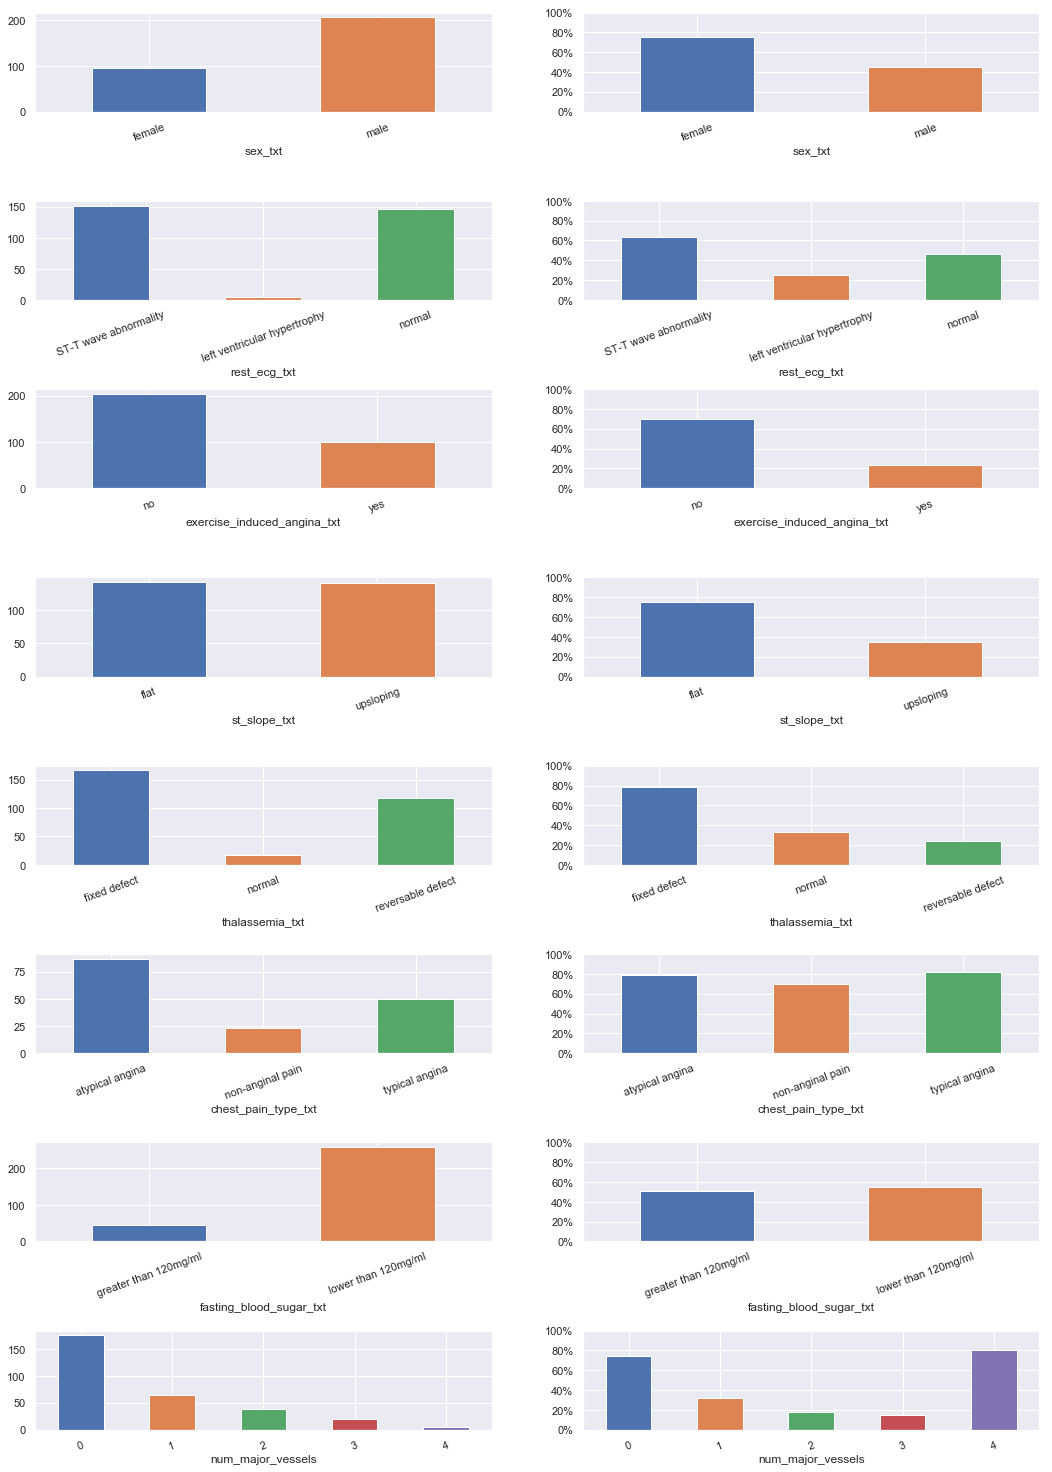

In [13]:
plt.figure(figsize=(18,33))
plt.subplots_adjust(hspace = 0.9)
for idx, col in enumerate(cols_cat):#For every categorical variable print the volume per group and the percentage that have the disease
    plt.subplot(10,2,2*idx+1)
    df.groupby(col)['flag'].sum().plot('bar',      grid = True)
    plt.xticks(rotation=20)
    
    plt.subplot(10,2,2*idx+2)
    df.groupby(col).target.mean().plot('bar',grid = True)
    plt.yticks([0,0.2,0.4,0.6,0.8,1,0],('0%','20%', '40%', '60%', '80%', '100%'))
    plt.xticks(rotation=20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


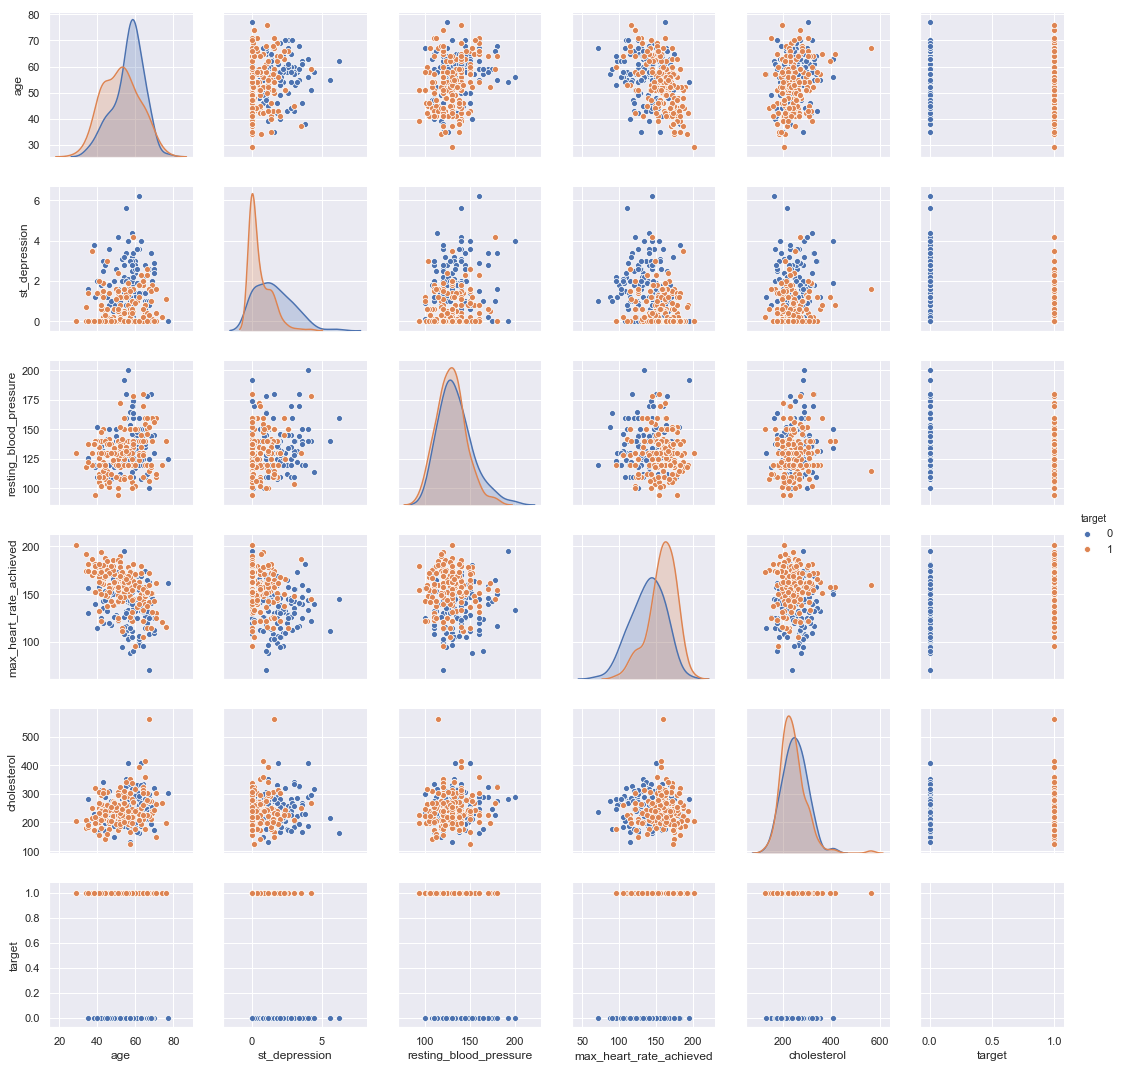

In [15]:
sns.pairplot(df[ cols_cont + ['target']], #Here i will see the difference between the distribution os continuous variables
             vars = cols_cont + ['target'], 
             hue = 'target')
plt.show()

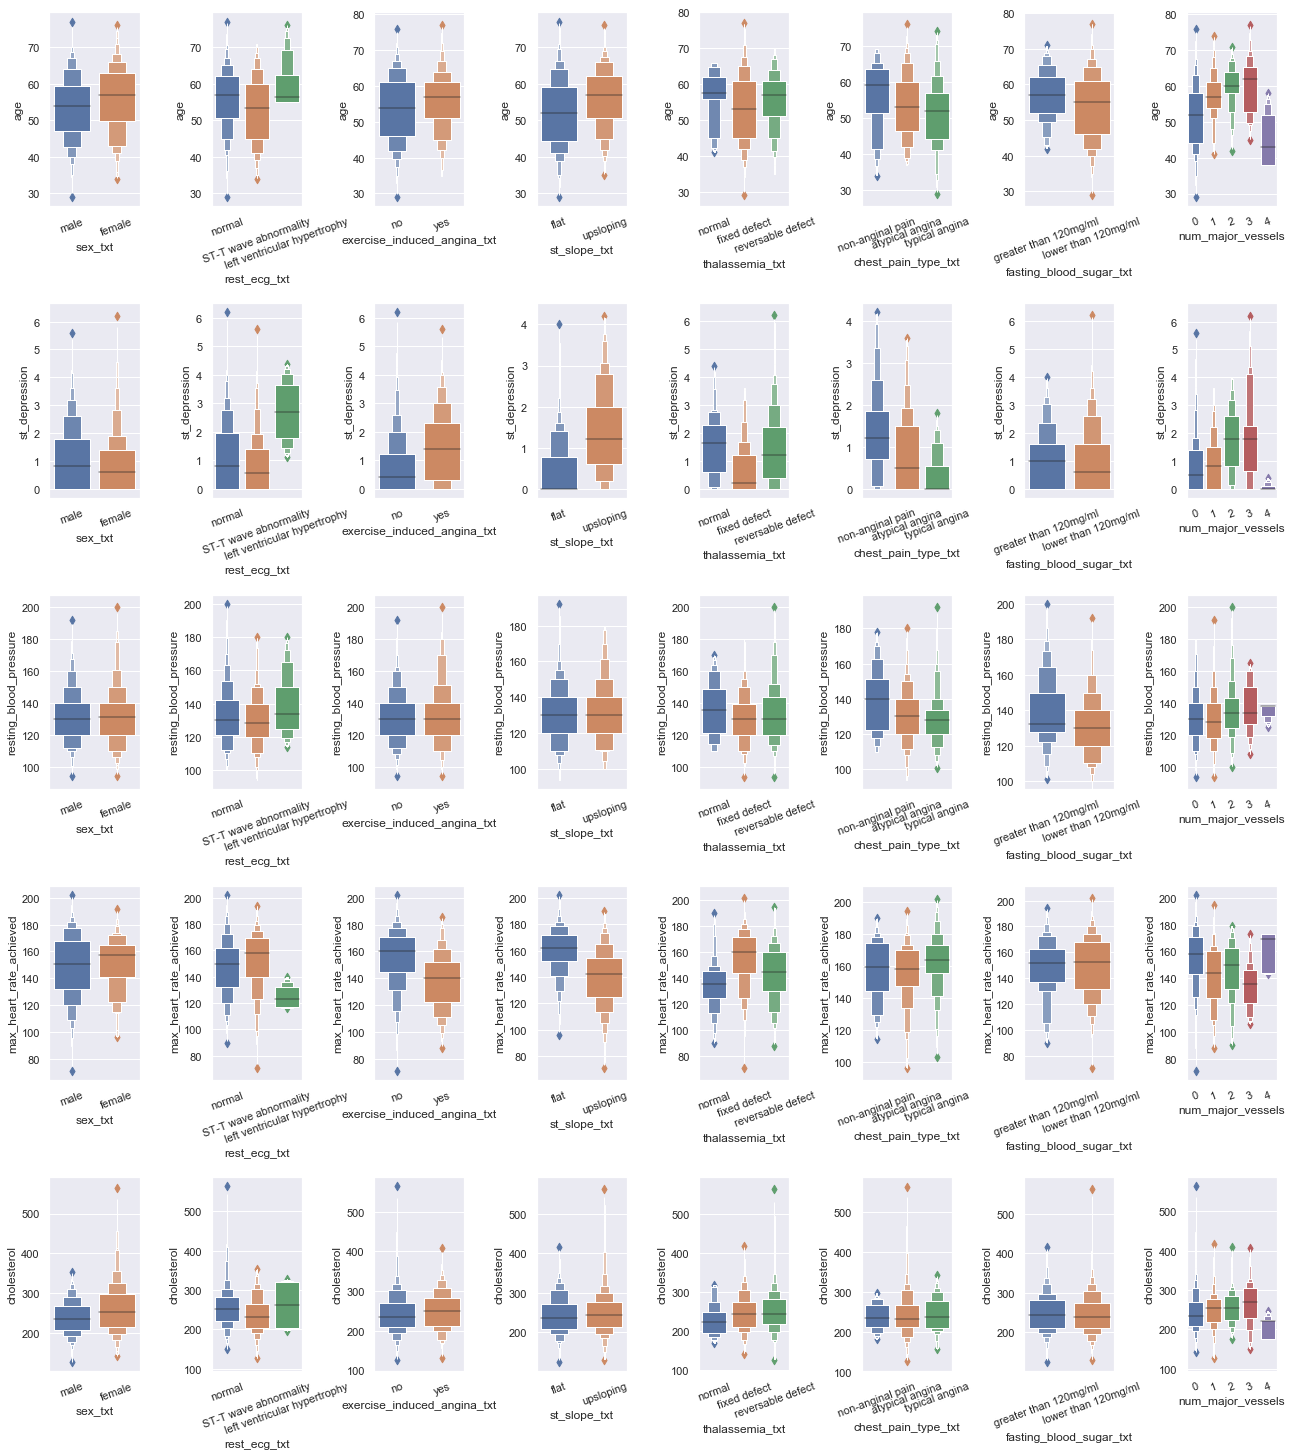

In [18]:
plt.figure(figsize=(22,25))
import itertools
for idx, element in enumerate(itertools.product(cols_cont,cols_cat )):#Here  i see the relations between categorical versus continuous variables

    plt.subplots_adjust(wspace = 0.8, hspace =0.5)
    plt.subplot(5,8,idx++1)
    
    sns.boxenplot(x=element[1], y=element[0], data=df)
    
    plt.xticks(rotation=20)    
    
plt.show()

In [19]:
#In the tests that i have made, the numerical variables outperformed the categorical ones, so I will drop thesse and keep only the numericals
df.drop([x for x in cols_cat if x!='num_major_vessels'] + ['flag'],axis = 1 , inplace = True)


# Preprocessing

In [21]:
X0 = df.iloc[:,:-1 ] #To the predictors set I keep all but the last column
y = df.iloc[:,-1:] # To the target I keep only  the last

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X = pd.DataFrame(std.fit_transform(X0), columns = X0.columns) #Here I Re-Scaled the dataframe, for better use of euclidean distances in the models

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # Make a Hold Out

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Modelagem

In [24]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
import xgboost as xgb
import lightgbm as lgbm

In [2]:
def estatisticas_modelo(X_test, y_test,X_train,y_train, modelo ):
    
    """Train and print statistics about the model in the Train and Test Sets """
    modelo.fit(X_train,y_train)
    y_pred_test = modelo.predict(X_test)
    y_pred_train = modelo.predict(X_train)
    
    
    plt.figure(figsize=(12,3))

    plt.subplot(1,2,1)
    
    sns.heatmap(confusion_matrix(y_train,y_pred_train,), annot=True)

    plt.subplot(1,2,2)
    sns.heatmap(confusion_matrix(y_test, y_pred_test,), annot=True)

    dtt = [
        ['accuracia', accuracy_score(y_test, y_pred_test,) , accuracy_score(y_train,y_pred_train) ],
        ['recall', recall_score(y_test,y_pred_test) , recall_score(y_train,y_pred_train) ],
        ['precision_score', precision_score(y_test,y_pred_test) , precision_score(y_train,y_pred_train) ],
        ['f1', f1_score(y_test,y_pred_test) , f1_score(y_train,y_pred_train) ],
        ['roc_auc', roc_auc_score(y_test,y_pred_test) , roc_auc_score(y_train,y_pred_train) ] ,
    ]
    dtt = pd.DataFrame(dtt, columns = ['Measure', 'Test', 'Train'])[['Measure', 'Train', 'Test']].set_index('Measure')
    print(dtt)
    plt.show()


## Baseline

In [27]:
dfXXX = pd.read_csv('heart.csv')#Here I will train a model without re-scaling, and no hyperparameters tuning
dfXXX.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

X_XXX = dfXXX.iloc[:,:-1 ]
y_XXX = dfXXX.iloc[:,-1:]


X_train_XXX, X_test_XXX, y_train_XXX, y_test_XXX = train_test_split(X_XXX, y_XXX, test_size=0.33, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


                    Train      Test
Measure                            
accuracia        0.768473  0.660000
recall           0.831776  0.706897
precision_score  0.754237  0.706897
f1               0.791111  0.706897
roc_auc          0.764846  0.651067


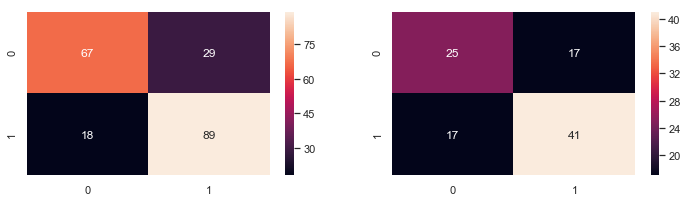

In [28]:
knn_XXX = KNeighborsClassifier(n_jobs = -1)


estatisticas_modelo(X_test_XXX, y_test_XXX,X_train_XXX,y_train_XXX, knn_XXX )

                 Train      Test
Measure                         
accuracia          1.0  0.750000
recall             1.0  0.706897
precision_score    1.0  0.836735
f1                 1.0  0.766355
roc_auc            1.0  0.758210


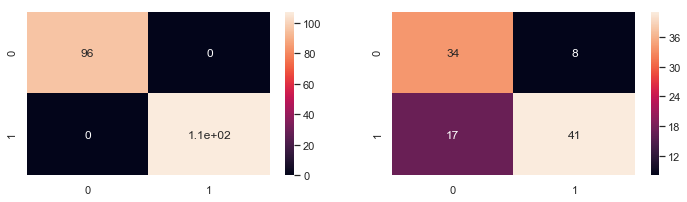

In [29]:
dt_XXX=DecisionTreeClassifier()
estatisticas_modelo(X_test_XXX, y_test_XXX,X_train_XXX,y_train_XXX, dt_XXX )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


                    Train      Test
Measure                            
accuracia        0.990148  0.800000
recall           0.981308  0.758621
precision_score  1.000000  0.880000
f1               0.990566  0.814815
roc_auc          0.990654  0.807882


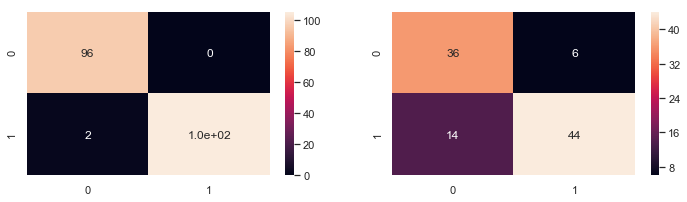

In [30]:
rf_XXX = RandomForestClassifier()

estatisticas_modelo(X_test_XXX, y_test_XXX,X_train_XXX,y_train_XXX,  rf_XXX )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                    Train      Test
Measure                            
accuracia        0.807882  0.800000
recall           0.785047  0.793103
precision_score  0.840000  0.851852
f1               0.811594  0.821429
roc_auc          0.809190  0.801314


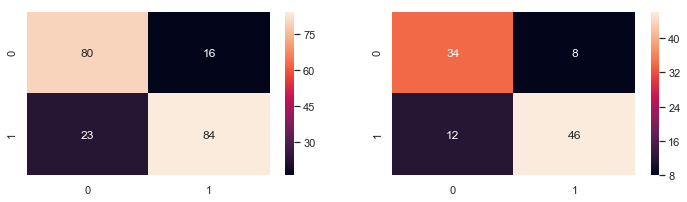

In [31]:
bnb_XXX = BernoulliNB()

estatisticas_modelo(X_test_XXX, y_test_XXX,X_train_XXX,y_train_XXX, bnb_XXX )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                 Train      Test
Measure                         
accuracia          1.0  0.830000
recall             1.0  0.810345
precision_score    1.0  0.886792
f1                 1.0  0.846847
roc_auc            1.0  0.833744


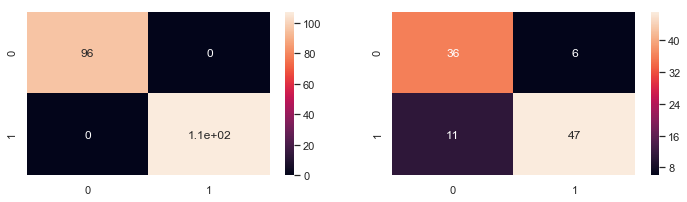

In [32]:
lgb_XXX = lgbm.LGBMClassifier( n_jobs= -1)

estatisticas_modelo(X_test_XXX, y_test_XXX,X_train_XXX,y_train_XXX, lgb_XXX )

In [ ]:
#The Best here is the lightgbm, who make 83% accuracy ando 81% of recall

## Naive Bayes

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                    Train      Test
Measure                            
accuracia        0.842365  0.850000
recall           0.859813  0.862069
precision_score  0.844037  0.877193
f1               0.851852  0.869565
roc_auc          0.841365  0.847701


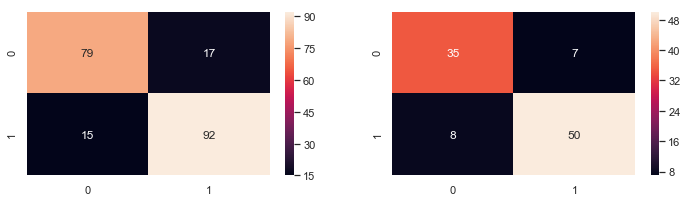

In [33]:
bnb = BernoulliNB()

estatisticas_modelo(X_test, y_test,X_train,y_train, bnb )

## KNN

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


                    Train      Test
Measure                            
accuracia        0.881773  0.860000
recall           0.897196  0.862069
precision_score  0.880734  0.892857
f1               0.888889  0.877193
roc_auc          0.880890  0.859606


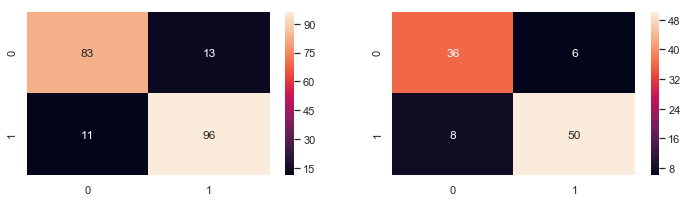

In [34]:
knn = KNeighborsClassifier(n_neighbors=7, n_jobs = -1)

estatisticas_modelo(X_test, y_test,X_train,y_train, knn )

In [ ]:
# Is interesting to see that the re-scaling makes all the difference for KNN.
# Without re-scaling we acchieved 66% Accuracy and 70% Recall(Vs 86% Now)

## Tree 

                    Train      Test
Measure                            
accuracia        0.862069  0.810000
recall           0.943925  0.844828
precision_score  0.821138  0.830508
f1               0.878261  0.837607
roc_auc          0.857379  0.803366


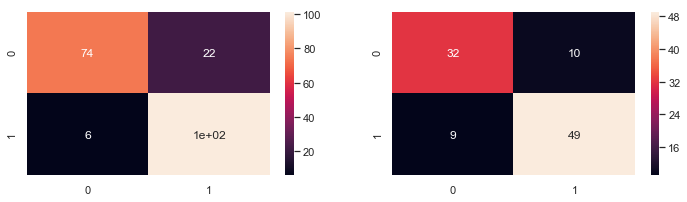

In [35]:
dt=DecisionTreeClassifier(max_depth=4,min_samples_leaf=15)
estatisticas_modelo(X_test, y_test,X_train,y_train, dt )

## Boosting

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                    Train      Test
Measure                            
accuracia        0.970443  0.860000
recall           0.981308  0.879310
precision_score  0.963303  0.879310
f1               0.972222  0.879310
roc_auc          0.969821  0.856322


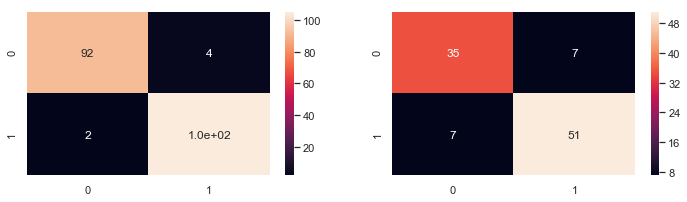

In [36]:
lgb = lgbm.LGBMClassifier( boosting_type='dart',max_depth=4, n_jobs= -1)

estatisticas_modelo(X_test, y_test,X_train,y_train, lgb )

## Random Forest

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


                    Train      Test
Measure                            
accuracia        0.852217  0.870000
recall           0.878505  0.913793
precision_score  0.846847  0.868852
f1               0.862385  0.890756
roc_auc          0.850711  0.861658


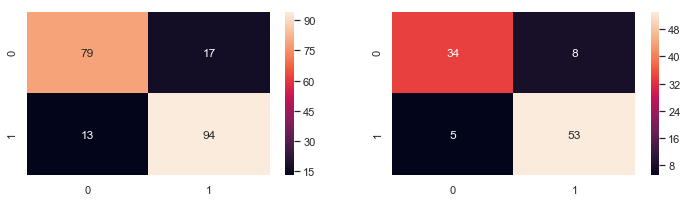

In [37]:
rf = RandomForestClassifier(n_estimators=28 , max_depth=4,min_samples_leaf=20, n_jobs= -1, random_state=50)

estatisticas_modelo(X_test, y_test,X_train,y_train, rf )

## Champion

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                    Train      Test
Measure                            
accuracia        0.896552  0.880000
recall           0.897196  0.913793
precision_score  0.905660  0.883333
f1               0.901408  0.898305
roc_auc          0.896515  0.873563


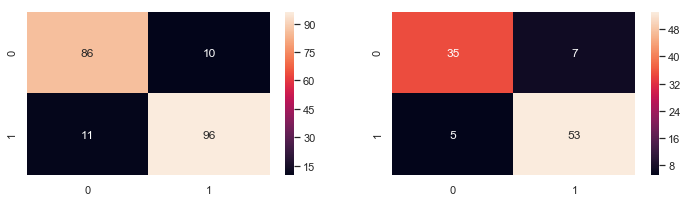

In [38]:
# In this model I will use Ensemble Learning. This approach makes me accomplish a better recall and a better Accuracy
rf = RandomForestClassifier(n_estimators=28 , max_depth=4,min_samples_leaf=20, n_jobs= -1, random_state=50)
bnb = BernoulliNB()
lgb = lgbm.LGBMClassifier(boosting_type='dart')
knn = KNeighborsClassifier(n_neighbors=7, n_jobs = -1)

estim = [
    ('rf', rf), 
    ('bnb', bnb),
    ('lgb',lgb),
    ('knn',knn)
]

voting = VotingClassifier(estimators=estim, voting='hard')

estatisticas_modelo(X_test, y_test,X_train,y_train, voting )